In [22]:
import pandas as pd
import numpy as np
import DS_Coma_Cluster_param as cc_prm
from DS_WCS_projections import *
from DS_data_transformation import *
from skimage.filters import gaussian
from astropy.coordinates import SkyCoord
from astropy import units as u

In [2]:
wcs = custom_wcs(cc_prm.ra_center, cc_prm.dec_center)

/home/rt2122/L/git/data-segmentation-2/modules/DS_WCS_projections.py:39: RuntimeWarning: cdelt will be ignored since cd is present
  w1.wcs.cdelt = w.wcs.cdelt[:2]


In [4]:
df = pd.read_csv('/home/rt2122/Data/coma_sweep/south/circle_2degree_filtered.csv')

In [5]:
pic = np.zeros((2048, 2048, 3))

In [6]:
pixels = wcs.all_world2pix(np.array(df['RA']), np.array(df['DEC']), 0)
pixels = np.array(pixels, dtype=np.int32).T

In [7]:
draw_data(pic, [df['FLUX_G'], df['FLUX_R'], df['FLUX_Z']], pixels)

<ipython-input-8-8333cd0a480c>:1: RuntimeWarning: Images with dimensions (M, N, 3) are interpreted as 2D+RGB by default. Use `multichannel=False` to interpret as 3D image with last dimension of length 3.
  show_pic(np.flipud(np.rot90(gaussian(pic, 20))), projection=wcs)
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


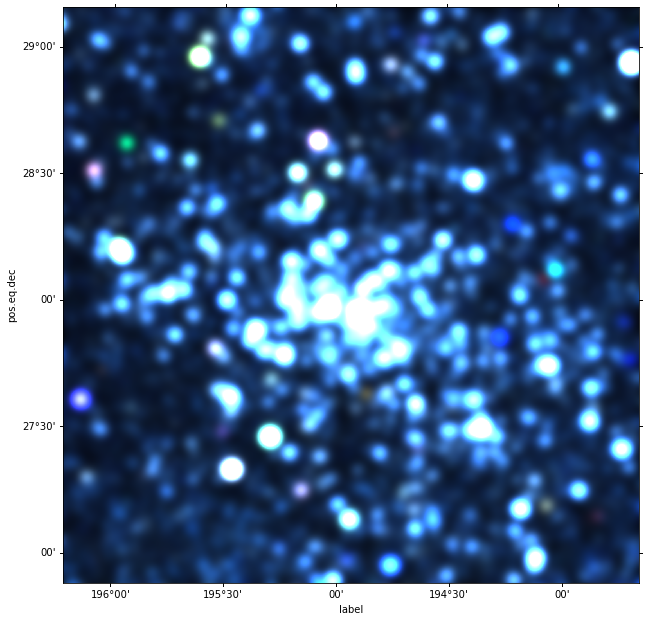

In [8]:
show_pic(np.flipud(np.rot90(gaussian(pic, 20))), projection=wcs)

In [9]:
df_max = n_max_flux_df(df, 100, ['FLUX_G', 'FLUX_R', 'FLUX_Z'])
df_max.index = np.arange(df_max.shape[0])

In [10]:
pixels_max = wcs.all_world2pix(np.array(df_max['RA']), np.array(df_max['DEC']), 0)
pixels_max = np.array(pixels_max, dtype=np.int32).T

In [17]:
circle_pic_g = draw_circles(pixels_max, df_max['FLUX_G'], (2048, 2048, 1), 0.04)
circle_pic_r = draw_circles(pixels_max, df_max['FLUX_R'], (2048, 2048, 1), 0.04)
circle_pic_z = draw_circles(pixels_max, df_max['FLUX_Z'], (2048, 2048, 1), 0.04)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


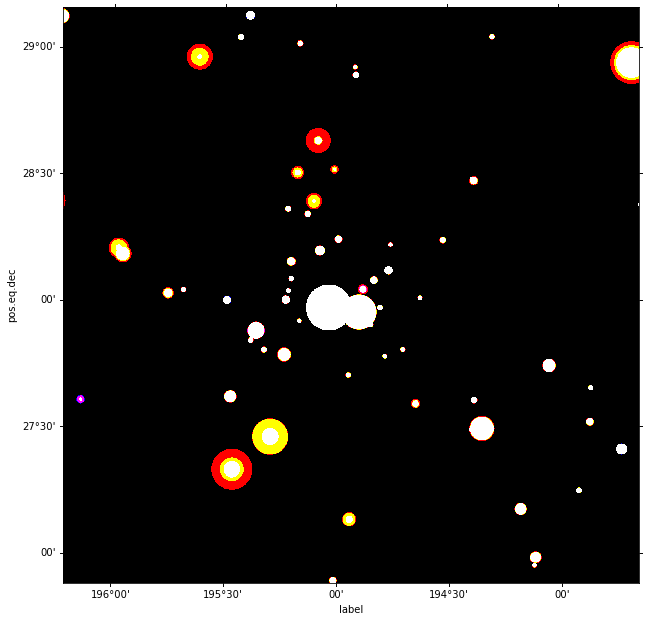

In [21]:
show_pic(np.flipud(np.rot90(np.dstack([circle_pic_g, circle_pic_r, 
                                       circle_pic_z]))), projection=wcs)

In [23]:
obj = np.array([[195.0332, 27.9825],
               [194.9027, 27.9655],
               [194.3515, 27.5023],
               [195.3547, 27.8902],
               [195.2954, 27.4693],
               [195.4657, 27.3363]])

In [14]:
pixel_obj = wcs.all_world2pix(obj[:,0], obj[:,1], 0)
pixel_obj = np.array(pixel_obj, dtype=np.int32).T

In [15]:
pic_obj = draw_circles(pixel_obj, 0.2 * np.arange(obj.shape[0]) + 0.2, 
                       circle_pic.shape, 0.04)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


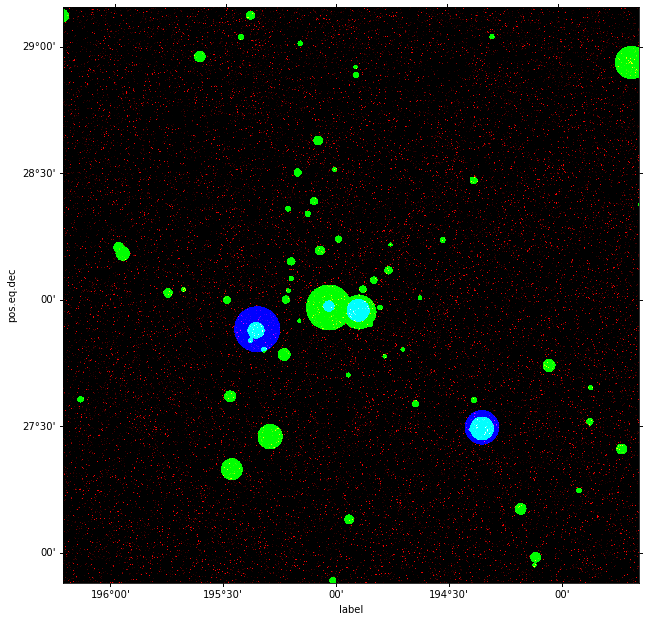

In [16]:
show_pic(np.flipud(np.rot90(np.dstack([pic[:,:,0].reshape((2048, 2048, 1)), 
                                       circle_pic, pic_obj]))), 
         projection=wcs)

In [22]:
pic[:,:,0].reshape((2048, 2048, 1)).shape

(2048, 2048, 1)

In [3]:
wcs.wcs

       flag: 137
      naxis: 2
      crpix: 0x560650696c20
               1024.5       1024.5    
         pc: 0x560650fcdd30
    pc[0][]:  -0.0011111    0.0000    
    pc[1][]:   0.0000       0.0011111 
      cdelt: 0x560650fcbef0
               1.0000       1.0000    
      crval: 0x560650fd9fa0
               194.94       28.026    
      cunit: 0x560651065010
             "deg"
             "deg"
      ctype: 0x5606506acc30
             "RA---TAN"
             "DEC--TAN"
    lonpole: 180.000000
    latpole: 28.025600
    restfrq: 0.000000
    restwav: 0.000000
        npv: 1
     npvmax: 64
         pv: 0x5606510a3d20
               2   0   0.0000    
        nps: 0
     npsmax: 8
         ps: 0x560650f08530
         cd: 0x56065046f2d0
    cd[0][]:  -0.0011111    0.0000    
    cd[1][]:   0.0000       0.0011111 
      crota: 0x560650f087c0
               0.0000       0.0000    
     altlin: 2
     velref: 0
        alt: ' '
     colnum: 0
      colax: 0x560650f087e0
              

In [24]:
sc = SkyCoord(ra=obj[-2:, 0]*u.degree, dec=obj[-2:, 1]*u.degree, frame='icrs')
sc1 = SkyCoord(ra=df_max['RA']*u.degree, dec=df_max['DEC']*u.degree, frame='icrs')

In [25]:
obj1 = sc[0].separation(sc1).degree <= 0.01
np.count_nonzero(obj1)

1

In [26]:
obj2 = sc[1].separation(sc1).degree <= 0.01
np.count_nonzero(obj2)

1

In [27]:
df_max[obj1]

RELEASE  BRICKID BRICKNAME  OBJID  TYPE          RA        DEC  \
54     8000   483716  1953p275   1418  PSF   195.294853  27.466816   

         RA_IVAR      DEC_IVAR      EBV  ...  GAIA_ASTROMETRIC_SIGMA5D_MAX  \
54  2.114765e+15  2.222447e+15  0.00719  ...                           0.0   

    GAIA_ASTROMETRIC_PARAMS_SOLVED  PARALLAX  PARALLAX_IVAR  PMRA  PMRA_IVAR  \
54                               0       0.0            0.0   0.0        0.0   

    PMDEC  PMDEC_IVAR  MASKBITS  phot_is_star_gaia  
54    0.0         0.0      2558                  0  

[1 rows x 120 columns]

In [28]:
df_max[obj2]

RELEASE  BRICKID BRICKNAME  OBJID  TYPE         RA        DEC  \
47     8000   482436  1955p272   3586  PSF   195.46458  27.337099   

         RA_IVAR      DEC_IVAR      EBV  ...  GAIA_ASTROMETRIC_SIGMA5D_MAX  \
47  1.386362e+15  1.246578e+15  0.01033  ...                           0.0   

    GAIA_ASTROMETRIC_PARAMS_SOLVED  PARALLAX  PARALLAX_IVAR  PMRA  PMRA_IVAR  \
47                               0       0.0            0.0   0.0        0.0   

    PMDEC  PMDEC_IVAR  MASKBITS  phot_is_star_gaia  
47    0.0         0.0      2558                  0  

[1 rows x 120 columns]

In [29]:
bright_obj2 = pd.concat([df_max[obj1], df_max[obj2]])
bright_obj2

RELEASE  BRICKID BRICKNAME  OBJID  TYPE          RA        DEC  \
54     8000   483716  1953p275   1418  PSF   195.294853  27.466816   
47     8000   482436  1955p272   3586  PSF   195.464580  27.337099   

         RA_IVAR      DEC_IVAR      EBV  ...  GAIA_ASTROMETRIC_SIGMA5D_MAX  \
54  2.114765e+15  2.222447e+15  0.00719  ...                           0.0   
47  1.386362e+15  1.246578e+15  0.01033  ...                           0.0   

    GAIA_ASTROMETRIC_PARAMS_SOLVED  PARALLAX  PARALLAX_IVAR  PMRA  PMRA_IVAR  \
54                               0       0.0            0.0   0.0        0.0   
47                               0       0.0            0.0   0.0        0.0   

    PMDEC  PMDEC_IVAR  MASKBITS  phot_is_star_gaia  
54    0.0         0.0      2558                  0  
47    0.0         0.0      2558                  0  

[2 rows x 120 columns]

In [30]:
bright_obj2.to_csv('/home/rt2122/Data/2obj.csv', index=False)